In [27]:
from wordcloud import WordCloud # 워드클라우드 제작 라이브러리
import pandas as pd # 데이터 프레임 라이브러리
import numpy as np # 행렬 라이브러리
import matplotlib.pyplot as plt # 워드클라우드 시각화 라이브러리

In [28]:
# 농구화 wordcloud
df=pd.read_csv("../crawling_csv/basketball_reviews_final.csv",encoding='utf-8-sig')
df.head()

,Product,Review 1,Review 2,Review 3,Review 4,Review 5,Review 6,Review 7,Review 8,Review 9,...,Review 101,Review 102,Review 103,Review 104,Review 105,Review 106,Review 107,Review 108,Review 109,Review 110
0,루카 3 PF,농민화로 구입신제품 색상발목 잘 잡아주고뭉퉁한 편 가볍고 푹신본드접합 뽑기운 있음맥...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,자이언 3 PF '리퀴드 메탈',멋있어서 샀는데 출퇴근용으론 산고벗기가 불편해서 힘들것 같고 운동할때 좋을것 같네요,피팅감이 완벽함.실물로 봤을때 색상이 완벽 그자체임.사이드 스탭시 전혀 밀리지 않는...,발목이 좋지 않아서 웨이트 할때 농구화를 이용합나다.자이언3는 코비처럼 발 전체를 ...,"평소 나이키 270신는데, 이 농구화도 270으로 주문했습니다. 발길이 딱맞고, 평...",난 발볼과 발등이 쫌 있는편임. 하지만 사이즈가 없어서 260을 구매하게됨. 솔직하...,코비8의 베이스 느낌 아웃솔이나 접지플레이 중간중간 손으로 먼지 한번씩만 쓸어내면 ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,북 1 EP '할로윈',"디자인,피팅,접지,쿠션 나무랄데없는 모델입니다. 가격도 합리적이고 괜찮은 선택이네요...",리뷰보고 정사이즈를 사야하나..반업을 해야하나 고민을 많이 했는데결국 반업해서 주문...,개인적으로 올해 최고의농구화 입니다. 접지 피팅 다만적스럽습니다. 다만 쿠션이 조금...,"실물이 너무 이쁘네요.........발도 편안하고,,,,,,접지가 너무 좋습니다.....",정사이즈 편하게 잘맞아요뒷 줌 잘 느껴지고앞쿠션은 쏘쏘접지는 굿,실제가 더 이쁘네요. 겉감도 고급스럽고 잘 신을 것 같습니다.,플레이뿐 아니라 일상용으로도 충분할 것 같은 디자인이라 선택했어요농구 하는날 내내 ...,"우선 할로윈 버전 구매했고, 아웃솔은 야광입니다. 지상고가 높은 착화감이나, 안정적...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,조던 에어(Heir) 시리즈 PF '화이트/블랙 볼트',솔직 리뷰 ㅋㅋ 배송 겁나 빠룸가성비 쵝오 갑최근 구매한 밧슈 중 베스트오브베스트신...,가벼워보이지만 발울 넣었을때 상당히 탄탄하고 안정감이 있습니다아웃솔 접지도 괜찮고 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,조던 원 테이크 5 PF,평소 사이즈: 285 / 주문 사이즈: 295착용감: 앞부분이 단단히 고정되어 많이...,꽉껴서 안에 고무? 가위로 자름 신발끈은 장식품일뿐 그이상 그이하도 아니다,쫀쫀하고 매우 단단하다.일단 로우탑 농구화 치고는 상당히 무거운편입니다.이유는 XD...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# 리뷰 합치기
cols=[]
for i in range(110):
    cols.append(f'Review {i+1}')

df['review_combined'] =df[cols].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
df['review_combined']

0     농민화로 구입신제품 색상발목 잘 잡아주고뭉퉁한 편 가볍고 푹신본드접합 뽑기운 있음맥...
1     멋있어서 샀는데 출퇴근용으론 산고벗기가 불편해서 힘들것 같고 운동할때 좋을것 같네요...
2     디자인,피팅,접지,쿠션 나무랄데없는 모델입니다. 가격도 합리적이고 괜찮은 선택이네요...
3     솔직 리뷰 ㅋㅋ 배송 겁나 빠룸가성비 쵝오 갑최근 구매한 밧슈 중 베스트오브베스트신...
4     평소 사이즈: 285 / 주문 사이즈: 295착용감: 앞부분이 단단히 고정되어 많이...
5     남자칭구 선물로 삿어요 신어보더니 좋아하네요 평보고 싯는데 잘산거같아요,이 농구화를...
6     지티컷3 신다가 자2도 신어보았습니다.동사이즈기준, 자2가 앞쪽 발가락부분이 조금 ...
7     구매후 5:5 각종대회 및 리그 소화 하였습니다. 최소 7분 4쿼터 X 8경기 이상...
8     디자인,접지 좋은데 쿠션은 전작보다 아쉬운 느낌이있고 사이즈는 정사이즈 가는게 맞는...
9     #멤버즈데이리뷰이벤트# 어퍼가 부드러워 발볼은 불편하지 않고 끈은 밖에서 안으로 넣...
10    사이즈 정사이즈가면 됩니다 클리어솔이라 접지도좋고 빠지는게 없네요,nan,nan,n...
11    먼저 구매하신분들 리뷰보고 사이즈반다운이 좋다는 글들보고10월초에 260으로 구매했...
12    멤버데이즈기간에 할인받아 구매해서기분 좋네요!! ㅎ검정색이라 오염걱정은 패쓰~ 아직...
13    오늘 처음 착용하고 겜 뛰었는데 저는 gt컷2 보다 좋네요~,운동화 265 - 27...
14    디자인이 예뻐 농구할 때 뿐만 아니라 캐주얼하게 매치할 수 있다. 컬러감도 괜찮고....
15    이거 진짜 발바닥이랑 발목 안아프고 디자인도 개 쌈@뽕하다 진짜 강추한다,이거 가볍...
16    진심 반다운하세요~제가 맥스285인데 이건 스포츠양말신고도 280이 맞네요~,색깔 ...
17    컬러 쿠션 다 좋은데 발볼이 지옥임무조건 사이즈업 추천해요,신발 예뻐요 쿠션

In [30]:
# 한글 제외 모든 문자 제거
df['review_combined'] = df['review_combined'].str.replace('[^가-힣]', ' ', regex = True)
df['review_combined']


0     농민화로 구입신제품 색상발목 잘 잡아주고뭉퉁한 편 가볍고 푹신본드접합 뽑기운 있음맥...
1     멋있어서 샀는데 출퇴근용으론 산고벗기가 불편해서 힘들것 같고 운동할때 좋을것 같네요...
2     디자인 피팅 접지 쿠션 나무랄데없는 모델입니다  가격도 합리적이고 괜찮은 선택이네요...
3     솔직 리뷰    배송 겁나 빠룸가성비 쵝오 갑최근 구매한 밧슈 중 베스트오브베스트신...
4     평소 사이즈        주문 사이즈     착용감  앞부분이 단단히 고정되어 많이...
5     남자칭구 선물로 삿어요 신어보더니 좋아하네요 평보고 싯는데 잘산거같아요 이 농구화를...
6     지티컷  신다가 자 도 신어보았습니다 동사이즈기준  자 가 앞쪽 발가락부분이 조금 ...
7     구매후     각종대회 및 리그 소화 하였습니다  최소  분  쿼터    경기 이상...
8     디자인 접지 좋은데 쿠션은 전작보다 아쉬운 느낌이있고 사이즈는 정사이즈 가는게 맞는...
9      멤버즈데이리뷰이벤트  어퍼가 부드러워 발볼은 불편하지 않고 끈은 밖에서 안으로 넣...
10    사이즈 정사이즈가면 됩니다 클리어솔이라 접지도좋고 빠지는게 없네요          ...
11    먼저 구매하신분들 리뷰보고 사이즈반다운이 좋다는 글들보고  월초에    으로 구매했...
12    멤버데이즈기간에 할인받아 구매해서기분 좋네요    검정색이라 오염걱정은 패쓰  아직...
13    오늘 처음 착용하고 겜 뛰었는데 저는   컷  보다 좋네요  운동화         ...
14    디자인이 예뻐 농구할 때 뿐만 아니라 캐주얼하게 매치할 수 있다  컬러감도 괜찮고 ...
15    이거 진짜 발바닥이랑 발목 안아프고 디자인도 개 쌈 뽕하다 진짜 강추한다 이거 가볍...
16    진심 반다운하세요 제가 맥스   인데 이건 스포츠양말신고도    이 맞네요  색깔 ...
17    컬러 쿠션 다 좋은데 발볼이 지옥임무조건 사이즈업 추천해요 신발 예뻐요 쿠션

In [31]:
import konlpy
kkma = konlpy.tag.Kkma() #형태소 분석기 꼬꼬마(Kkma)

nouns = df['review_combined'].apply(kkma.nouns)
nouns

0     [농민, 구입, 구입신제품, 신제품, 색상, 색상발목, 발목, 뭉, 편, 신, 신본...
1     [출퇴근, 산고, 불편, 운동, 때, 피팅, 피팅감이, 감이, 완벽, 실물, 색상,...
2     [디자인, 피팅, 접지, 쿠션, 데, 모델, 가격, 합리적, 선택, 사, 사이즈, ...
3     [솔, 솔직, 직, 리뷰, 배송, 빠룸, 성비, 쵝, 쵝오, 오, 갑, 갑최근, 최...
4     [평소, 사이즈, 주문, 착용, 앞, 앞부분, 부분, 고정, 타이트, 타이트함, 함...
5     [남자, 남자칭구, 칭, 구, 선물, 삿어, 신어, 평보, 싯, 거, 농구화, 신고...
6     [지, 지티컷, 티, 컷, 도, 신어, 동사, 동사이즈기준, 이즈, 기준, 앞쪽, ...
7     [구매, 구매후, 후, 각종, 각종대회, 대회, 리그, 소화, 하, 최소, 분, 쿼...
8     [디자인, 접지, 쿠션, 전작, 느낌, 사이즈, 정, 정사이즈, 거, 저, 발, 사...
9     [데이, 버즈, 리뷰, 리뷰이벤트, 이벤트, 어퍼, 발, 발볼, 볼, 불편, 끈, ...
10               [사이즈, 정, 정사이즈가면, 가면, 클리어, 클리어솔, 솔, 접지]
11    [구매, 분, 리뷰, 리뷰보고, 보고, 사이즈, 사이즈반다운, 반, 다운, 글, 월...
12    [멤버, 멤버데이즈기간, 데, 이즈, 기간, 할인, 구매, 기분, 검정색, 오염, ...
13    [오늘, 처음, 착용, 겜, 컷, 동화, 신고, 농구화, 사이, 마, 반, 반다운,...
14    [디자인, 농구, 때, 뿐, 캐주얼, 매치, 수, 컬러, 컬러감도, 감도, 앞부분,...
15    [이거, 발바닥, 발목, 안, 디자인, 개, 쌈, 뽕, 뽕하다, 하다, 강추, 거,...
16    [진심, 반, 하세, 제가, 맥스, 스포츠, 스포츠양말신고, 양말, 신고, 이, 색...
17    [컬러, 쿠션, 발, 발볼, 볼, 지옥, 지옥임무조건, 임무, 조건, 사이즈

In [32]:
nouns = nouns.explode()
nouns

0           농민
0           구입
0        구입신제품
0          신제품
0           색상
0         색상발목
0           발목
0            뭉
0            편
0            신
0        신본드접합
0           본드
0           접합
0            운
0           있음
0         있음맥스
0           맥스
0           신음
0          사이즈
0            업
0        업개인의견
0           개인
0           의견
1          출퇴근
1           산고
1           불편
1           운동
1            때
1           피팅
1         피팅감이
1           감이
1           완벽
1           실물
1           색상
1           자체
1          자체임
1            임
1          사이드
1           스탭
1          스탭시
1            시
1           접지
1           보임
1           발목
1          웨이트
1          농구화
1           이용
1          이용합
1            합
1            자
1          자이언
1           이언
1           코비
1            발
1           전체
1           지상
1         지상고도
1           고도
1          안정적
1           무게
1            수
1           인솔
1           표면
1           고무
1         고무재질
1           재질
1         

In [ ]:
# pd.set_option('display.max_rows', None)  # 최대 행 수 제한 해제
pd.set_option('display.max_rows', 10) # 10행으로 제한

df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2') # 글자수 2개 이상 가져오기
df_word

,word,count
0,농민,2
0,구입,2
0,구입신제품,5
0,신제품,3
0,색상,2
...,...,...
21,밑창,2
21,어두움,3
21,어두움흰색,5
21,흰색,2


In [40]:
df_word=df_word.groupby('word',as_index=False).count().sort_values('count', ascending = False)
df_word


,word,count
330,사이즈,18
571,접지,13
582,정사이즈,12
127,농구화,11
687,쿠션,11
...,...,...
294,베스트오브,1
295,베이스,1
296,벨크,1
298,보스,1


In [35]:
# 워드 클라우드 만들기
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

{'사이즈': 18,
 '접지': 13,
 '정사이즈': 12,
 '농구화': 11,
 '쿠션': 11,
 '피팅': 11,
 '생각': 11,
 '구매': 10,
 '느낌': 10,
 '리뷰': 10,
 '이즈': 9,
 '추천': 9,
 '처음': 9,
 '발볼': 9,
 '가격': 8,
 '신발': 8,
 '디자인': 8,
 '신어': 7,
 '만족': 7,
 '착용': 7,
 '부분': 7,
 '지상': 7,
 '플레이': 6,
 '발등': 6,
 '발목': 6,
 '보고': 6,
 '길이': 6,
 '정도': 6,
 '멤버': 5,
 '불편': 5,
 '반업': 5,
 '주문': 5,
 '이상': 5,
 '다운': 5,
 '신고': 5,
 '편안': 5,
 '양말': 5,
 '최고': 5,
 '하나': 5,
 '착화': 5,
 '농구': 5,
 '어퍼': 5,
 '사람': 5,
 '운동': 4,
 '아웃솔': 4,
 '맥스': 4,
 '지상고가': 4,
 '착화감': 4,
 '평소': 4,
 '업해': 4,
 '가격대비': 4,
 '때문': 4,
 '제가': 4,
 '구입': 4,
 '실물': 4,
 '스타일': 4,
 '리뷰보고': 4,
 '기준': 4,
 '쿠션감': 4,
 '데이즈': 4,
 '개인적': 4,
 '대비': 4,
 '이벤트': 4,
 '컬러': 4,
 '고가': 4,
 '하다': 4,
 '성비': 4,
 '감이': 4,
 '여유': 3,
 '앞부분': 3,
 '쿠셔닝': 3,
 '코비': 3,
 '완전': 3,
 '라인': 3,
 '착화감도': 3,
 '오늘': 3,
 '안정감': 3,
 '앞쪽': 3,
 '색상': 3,
 '리뷰이벤트': 3,
 '발볼러': 3,
 '일반': 3,
 '선택': 3,
 '있음': 3,
 '자체': 3,
 '부족': 3,
 '전반적': 3,
 '전체적': 3,
 '버전': 3,
 '배송': 3,
 '점프': 3,
 '의견': 3,
 '진짜': 3,
 '나이키': 3,
 '스포츠': 3,
 '반업해': 

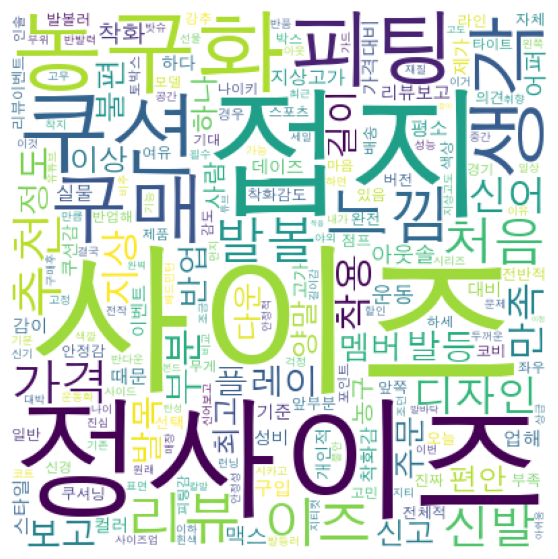

In [42]:
wc = WordCloud(random_state = 123, font_path = 'AppleGothic', width = 400,
               height = 400, background_color = 'white')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (7, 7))
plt.axis('off')
plt.imshow(img_wordcloud)
plt.savefig('basketball_wordcloud.png')